In [15]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import scipy  as sp
from sklearn.feature_extraction.text import TfidfVectorizer, HashingVectorizer, CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import sklearn.linear_model as lm
import sklearn.model_selection as ms

In [2]:
#load train data
df_train = pd.read_csv('train.csv').dropna()

In [3]:
df_train.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [4]:
print( 'Number of training samples:{0}'.format(df_train['id'].count()))
print ('Number of Non Duplicate training samples:{0}'.format(df_train[df_train.is_duplicate == 0]['id'].count()))
print ('Number of Duplicate training samples:{0}'.format(df_train[df_train.is_duplicate == 1]['id'].count()))

Number of training samples:404287
Number of Non Duplicate training samples:255024
Number of Duplicate training samples:149263


In [5]:
df_test= pd.read_csv('test.csv').dropna()
df_test.head()

,test_id,question1,question2
0,0,How does the Surface Pro himself 4 compare wit...,Why did Microsoft choose core m3 and not core ...
1,1,Should I have a hair transplant at age 24? How...,How much cost does hair transplant require?
2,2,What but is the best way to send money from Ch...,What you send money to China?
3,3,Which food not emulsifiers?,What foods fibre?
4,4,"How ""aberystwyth"" start reading?",How their can I start reading?


In [6]:
print( 'Number of training samples:{0}'.format(df_test['test_id'].count()))


Number of training samples:2345790


# EDA

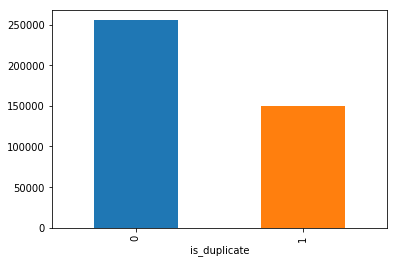

In [8]:
df_train.groupby('is_duplicate')['id'].count().plot.bar()

2500


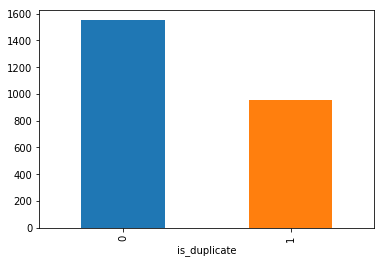

In [12]:
# sample 10% of data to experimentation

df2 = df_train[0:2500] #df_train.sample(frac=0.1)

print(df2['id'].count())

df2.groupby('is_duplicate')['id'].count().plot.bar()

In [13]:
dfq1, dfq2 = df2[['qid1', 'question1']], df2[['qid2', 'question2']]
dfq1.columns = ['qid1', 'question']
dfq2.columns = ['qid2', 'question']

# merge two two dfs, there are two nans for question
dfqa = pd.concat((dfq1, dfq2), axis=0).fillna("")
nrows_for_q1 = dfqa.shape[0]/2
dfqa.shape

(5000, 3)

In [14]:
dfqa.head()

,qid1,qid2,question
0,1,,What is the step by step guide to invest in sh...
1,3,,What is the story of Kohinoor (Koh-i-Noor) Dia...
2,5,,How can I increase the speed of my internet co...
3,7,,Why am I mentally very lonely? How can I solve...
4,9,,"Which one dissolve in water quikly sugar, salt..."


In [16]:
tfidf = TfidfVectorizer(max_features=256).fit_transform(dfqa['question'].values)
tfidf

<5000x256 sparse matrix of type '<class 'numpy.float64'>'
	with 31365 stored elements in Compressed Sparse Row format>

In [25]:
print(dfqa['question'][1].values)
print(tfidf[0])

['What is the story of Kohinoor (Koh-i-Noor) Diamond?'
 'What would happen if the Indian government stole the Kohinoor (Koh-i-Noor) diamond back?']
  (0, 236)	0.211791909528
  (0, 110)	0.240153871445
  (0, 201)	0.214283694109
  (0, 34)	0.522859665552
  (0, 212)	0.269768572097
  (0, 104)	0.536507960539
  (0, 106)	0.466427592937


In [27]:
print(tfidf[1::2])

  (0, 110)	0.493721636376
  (0, 153)	0.610394763347
  (0, 201)	0.440536292283
  (0, 236)	0.435413543467
  (1, 9)	0.646474529077
  (1, 35)	0.369493670384
  (1, 100)	0.287451236684
  (1, 111)	0.435465713625
  (1, 243)	0.416276962594
  (2, 4)	0.449683627421
  (2, 9)	0.482391688588
  (2, 11)	0.269395040634
  (2, 54)	0.342912169325
  (2, 131)	0.451372063633
  (2, 200)	0.371489923377
  (2, 236)	0.182150891357
  (3, 20)	0.554516515611
  (3, 35)	0.422913740846
  (3, 83)	0.636716485865
  (3, 100)	0.329009906152
  (4, 35)	0.392072323144
  (4, 41)	0.790705962063
  (4, 143)	0.470173771049
  (5, 11)	0.372378251309
  (5, 53)	0.339844990403
  :	:
  (2497, 105)	0.414987856575
  (2497, 111)	0.227001047827
  (2497, 149)	0.312988095956
  (2497, 153)	0.356776022381
  (2497, 232)	0.305405476654
  (2497, 251)	0.294587856336
  (2498, 11)	0.180902274911
  (2498, 23)	0.369984384721
  (2498, 56)	0.349049015009
  (2498, 61)	0.393863609653
  (2498, 88)	0.382795763399
  (2498, 101)	0.242320447265
  (2498, 201)	0.1

In [32]:
diff_encoding = np.abs(tfidf[::2] - tfidf[1::2])

print(type(diff_encoding[0]))

<class 'scipy.sparse.csr.csr_matrix'>


Possible features:

1. Character length of questions 1 and 2
2. number of words in question 1 and 2
3. normalized word share count
